In [14]:
import time
import copy
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from collections import OrderedDict
import os
import sys

sys.path.append('/home/christoph/Dokumente/christoph-MA/MA-Repo')
import Dataloader_patches
import Dataloader_slice_parts_aggregator
from train import train_model
from eval import evaluate_model
import SwinUNETR

In [17]:
model_path = "/home/christoph/Dokumente/christoph-MA//research-contributions/swin_unetr.base_5000ep_f48_lr2e-4_pretrained.pt"

state_dict = torch.load(model_path, weights_only=False)

if 'state_dict' in state_dict:
    state_dict = state_dict['state_dict']

device =  torch.device("cuda:0")

# Initialize the SwinUNETR model
model = SwinUNETR.swin_unetr_base(input_size=(128, 128, 32), trainable_layers=["all"], in_channels=1, spatial_dims=3)

# Modify the model's final layers
model.load_state_dict(state_dict=state_dict, strict=False)

# Modify the model's final layers after loading the state dictionary
#model.swinViT.layers4[0].downsample.reduction = nn.Linear(3072, 3)

--- patch_embed.proj.weight is now trainable
--- patch_embed.proj.bias is now trainable
--- layers1.0.blocks.0.norm1.weight is now trainable
--- layers1.0.blocks.0.norm1.bias is now trainable
--- layers1.0.blocks.0.attn.relative_position_bias_table is now trainable
--- layers1.0.blocks.0.attn.qkv.weight is now trainable
--- layers1.0.blocks.0.attn.qkv.bias is now trainable
--- layers1.0.blocks.0.attn.proj.weight is now trainable
--- layers1.0.blocks.0.attn.proj.bias is now trainable
--- layers1.0.blocks.0.norm2.weight is now trainable
--- layers1.0.blocks.0.norm2.bias is now trainable
--- layers1.0.blocks.0.mlp.linear1.weight is now trainable
--- layers1.0.blocks.0.mlp.linear1.bias is now trainable
--- layers1.0.blocks.0.mlp.linear2.weight is now trainable
--- layers1.0.blocks.0.mlp.linear2.bias is now trainable
--- layers1.0.blocks.1.norm1.weight is now trainable
--- layers1.0.blocks.1.norm1.bias is now trainable
--- layers1.0.blocks.1.attn.relative_position_bias_table is now trainabl

_IncompatibleKeys(missing_keys=[], unexpected_keys=['encoder1.layer.conv1.conv.weight', 'encoder1.layer.conv2.conv.weight', 'encoder1.layer.conv3.conv.weight', 'encoder2.layer.conv1.conv.weight', 'encoder2.layer.conv2.conv.weight', 'encoder3.layer.conv1.conv.weight', 'encoder3.layer.conv2.conv.weight', 'encoder4.layer.conv1.conv.weight', 'encoder4.layer.conv2.conv.weight', 'encoder10.layer.conv1.conv.weight', 'encoder10.layer.conv2.conv.weight', 'decoder5.transp_conv.conv.weight', 'decoder5.conv_block.conv1.conv.weight', 'decoder5.conv_block.conv2.conv.weight', 'decoder5.conv_block.conv3.conv.weight', 'decoder4.transp_conv.conv.weight', 'decoder4.conv_block.conv1.conv.weight', 'decoder4.conv_block.conv2.conv.weight', 'decoder4.conv_block.conv3.conv.weight', 'decoder3.transp_conv.conv.weight', 'decoder3.conv_block.conv1.conv.weight', 'decoder3.conv_block.conv2.conv.weight', 'decoder3.conv_block.conv3.conv.weight', 'decoder2.transp_conv.conv.weight', 'decoder2.conv_block.conv1.conv.weigh

In [18]:
print(model)

SwinUNETR_enc(
  (swinViT): SwinTransformer_v2(
    (patch_embed): PatchEmbed(
      (proj): Conv3d(1, 48, kernel_size=(2, 2, 2), stride=(2, 2, 2))
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (layers1): ModuleList(
      (0): BasicLayer(
        (blocks): ModuleList(
          (0-1): 2 x SwinTransformerBlock(
            (norm1): LayerNorm((48,), eps=1e-05, elementwise_affine=True)
            (attn): WindowAttention(
              (qkv): Linear(in_features=48, out_features=144, bias=True)
              (attn_drop): Dropout(p=0.0, inplace=False)
              (proj): Linear(in_features=48, out_features=48, bias=True)
              (proj_drop): Dropout(p=0.0, inplace=False)
              (softmax): Softmax(dim=-1)
            )
            (drop_path): Identity()
            (norm2): LayerNorm((48,), eps=1e-05, elementwise_affine=True)
            (mlp): MLPBlock(
              (linear1): Linear(in_features=48, out_features=192, bias=True)
              (linear2): Linear(in_

In [10]:
from torchvision import models
data_path = "/storage/Datensätze"
augmentation = None
encoder = models.swin_v2_b(weights=models.Swin_V2_B_Weights.IMAGENET1K_V1)
device = "cuda"
encoder.to(device)

dataset = Dataloader_slice_parts_aggregator.VolumeToSlicepartsDataset(data_path, transform=None, test=True, encoder=encoder, augmentation=augmentation)

/storage/Datensätze/lung_test
/storage/Datensätze/lung_test/tom_2023-10-10-10-05-25_00.raw
/storage/Datensätze/lung_test/tom_2023-10-10-11-23-15_00.raw


KeyboardInterrupt: 

In [13]:
encoder = models.swin_v2_b(weights=models.Swin_V2_B_Weights.IMAGENET1K_V1)
print(encoder)

KeyboardInterrupt: 

In [8]:
print(encoder)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [3]:
loader = DataLoader(dataset,batch_size=8, shuffle=True)

In [7]:
data = dataset.__getitem__(0)
print(data)
first_item = next(iter(loader))
print(first_item)

(tensor([[-0.7217, -0.4345, -0.6312,  ..., -0.5798,  1.2896,  1.0572],
        [-0.7515, -0.4792, -0.4109,  ..., -0.6597,  1.4701,  1.0190],
        [-0.7437, -0.4479, -0.6775,  ..., -0.6250,  1.2519,  0.8995],
        ...,
        [-0.4978, -0.4123, -0.5458,  ..., -0.4998,  1.2908,  1.0898],
        [-0.8459, -0.6389, -0.6058,  ..., -0.6396,  1.4153,  0.8827],
        [-0.8376, -0.4929, -0.6034,  ..., -0.5620,  1.2735,  1.1696]],
       device='cuda:0'), tensor(0), [array([[37058, 37673, 37775, ..., 35657, 35581, 35068],
       [37220, 37485, 37715, ..., 35384, 35256, 35324],
       [37399, 37220, 37647, ..., 35324, 35299, 35043],
       ...,
       [35470, 35273, 35401, ..., 34795, 34778, 35077],
       [35196, 35265, 35521, ..., 34812, 34667, 35119],
       [35077, 35188, 35359, ..., 34821, 34974, 35341]], dtype='>u2'), array([[29168, 28801, 28989, ..., 29484, 29689, 29894],
       [29219, 29031, 29270, ..., 29680, 29646, 29313],
       [29296, 29501, 29347, ..., 30141, 29638, 29253

ValueError: given numpy array has byte order different from the native byte order. Conversion between byte orders is currently not supported.

In [7]:
data = dataset.__getitem__(0)

works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
work

In [15]:
data[1].shape

torch.Size([])

In [19]:
model_path = "/home/christoph/Dokumente/christoph-MA//research-contributions/swin_unetr.base_5000ep_f48_lr2e-4_pretrained.pt"

state_dict = torch.load(model_path, weights_only=False)

if 'state_dict' in state_dict:
    state_dict = state_dict['state_dict']

device =  torch.device("cuda:0")

# Initialize the SwinUNETR model
model = SwinUNETR.swin_unetr_base(input_size=(128, 128, 32), trainable_layers=["all"], in_channels=1, spatial_dims=3)
print(model)




--- patch_embed.proj.weight is now trainable
--- patch_embed.proj.bias is now trainable
--- layers1.0.blocks.0.norm1.weight is now trainable
--- layers1.0.blocks.0.norm1.bias is now trainable
--- layers1.0.blocks.0.attn.relative_position_bias_table is now trainable
--- layers1.0.blocks.0.attn.qkv.weight is now trainable
--- layers1.0.blocks.0.attn.qkv.bias is now trainable
--- layers1.0.blocks.0.attn.proj.weight is now trainable
--- layers1.0.blocks.0.attn.proj.bias is now trainable
--- layers1.0.blocks.0.norm2.weight is now trainable
--- layers1.0.blocks.0.norm2.bias is now trainable
--- layers1.0.blocks.0.mlp.linear1.weight is now trainable
--- layers1.0.blocks.0.mlp.linear1.bias is now trainable
--- layers1.0.blocks.0.mlp.linear2.weight is now trainable
--- layers1.0.blocks.0.mlp.linear2.bias is now trainable
--- layers1.0.blocks.1.norm1.weight is now trainable
--- layers1.0.blocks.1.norm1.bias is now trainable
--- layers1.0.blocks.1.attn.relative_position_bias_table is now trainabl

In [27]:
random_input = torch.randn(1,128, 128, 32).to(device)
model.to(device)
out = model(random_input)

RuntimeError: Given normalized_shape=[48], expected input with shape [*, 48], but got input of size[48, 64, 16, 64]

In [26]:
linear = nn.Linear(768, 3)
linear.to(device)
print(out.shape)
out = linear(out)
print(out.shape)

torch.Size([1, 768])
torch.Size([1, 3])


In [7]:
data_path = "/storage/Datensätze"
dataset = Dataloader_slice_parts.VolumeToSlicepartsDataset(root_dir=data_path,test=True,augmentation="elastic")

/storage/Datensätze/lung_test
/storage/Datensätze/lung_test/tom_2023-10-10-10-05-25_00.raw
/storage/Datensätze/lung_test/tom_2023-10-10-11-23-15_00.raw
/storage/Datensätze/skin_test
/storage/Datensätze/skin_test/tom_2024-01-26-10-40-06_00.raw
/storage/Datensätze/skin_test/tom_2024-03-29-10-41-00_00.raw
/storage/Datensätze/skin_test/tom_2024-01-25-17-52-24_00.raw
/storage/Datensätze/intestine_test
/storage/Datensätze/intestine_test/tom_2024-06-18-13-23-38_00.raw
/storage/Datensätze/intestine_test/tom_2023-08-30-14-36-45_00.raw


In [1]:
import torch
from captum.attr import IntegratedGradients


/home/christoph/Dokumente/christoph-MA/MAenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from torchvision import models
import torch.nn as nn
from collections import OrderedDict

model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

num_ftrs = model.fc.in_features

model.fc = nn.Linear(num_ftrs, 3)

model_path = '/home/christoph/Dokumente/christoph-MA/Models/resnet_2D_organ_classificatio_slide_parts_tripath_aug.pth'

state_dict = torch.load(model_path)

# Remove 'module.' prefix if present
new_state_dict = OrderedDict()
for k, v in state_dict.items():
    if k.startswith('module.'):
        new_state_dict[k[7:]] = v  
    else:
        new_state_dict[k] = v

# Load the modified state dictionary into the model
model.load_state_dict(new_state_dict)

<All keys matched successfully>

In [80]:
sample = dataset.__getitem__(10020)

In [81]:
dataset.__len__()//2

77039

In [88]:
sample[1]

tensor(0)

In [89]:
import torch.functional as F
model.eval()
output = model(sample[0].unsqueeze(0))
print(output)
import torch.nn.functional as F

softmax_output = F.softmax(output, dim=1)
print(softmax_output)


tensor([[ 2.5274, -4.3520,  2.6718]], grad_fn=<AddmmBackward0>)
tensor([[4.6372e-01, 4.7707e-04, 5.3580e-01]], grad_fn=<SoftmaxBackward0>)


In [86]:
ig = IntegratedGradients(model)
attributions, delta = ig.attribute(sample[0].unsqueeze(0), target=sample[1], return_convergence_delta=True)

In [85]:

numpy_attributions = attributions.squeeze(0).detach().numpy()

In [ ]:
import elasticdeform

deformed =  elasticdeform.deform_random_grid(sample[0], sigma=2, axis=(0, 1, 2),order=1, mode='constant')

In [ ]:
image, label = dataset.__getitem__(1714+1000)

image_untransformed, label = dataset.__getitem__(1000)

In [ ]:
print(image_untransformed.shape)
transform = Rotation_transform.RandomRotate2D()

rotated_image = transform(image_untransformed)
print(rotated_image.shape)

In [ ]:
count = 0
for i in range(int(dataset.__len__()/2)):

    image, label = dataset.__getitem__(dataset.__len__()//2+i)
    print(image.shape)
    image_untransformed, label = dataset.__getitem__(i)
    if image.equal(image_untransformed):
        print("equal")
        count += 1
print(count)


In [ ]:
import torchio.transforms as tio

elastic_def = tio.RandomElasticDeformation(num_control_points=(5,9,9),locked_borders=2,max_displacement=(2,10,10)) 
sample = torch.tensor(sample[0])
deformed_tio = elastic_def(sample[0])

In [ ]:
image_rotated = Rotation_transform.RandomRotate2D()(image_untransformed)

In [ ]:
sample[0].shape

In [17]:
import Dataloader_whole_slices
data_path = "/storage/Datensätze"
dataset = Dataloader_whole_slices.VolumeToSliceDataset(root_dir=data_path, transform=None, test=True)



/storage/Datensätze/lung_test
/storage/Datensätze/lung_test/tom_2023-10-10-10-05-25_00.raw
/storage/Datensätze/lung_test/tom_2023-10-10-11-23-15_00.raw
/storage/Datensätze/skin_test
/storage/Datensätze/skin_test/tom_2024-01-26-10-40-06_00.raw
/storage/Datensätze/skin_test/tom_2024-03-29-10-41-00_00.raw
/storage/Datensätze/skin_test/tom_2024-01-25-17-52-24_00.raw
/storage/Datensätze/intestine_test
/storage/Datensätze/intestine_test/tom_2024-06-18-13-23-38_00.raw
/storage/Datensätze/intestine_test/tom_2023-08-30-14-36-45_00.raw


In [43]:
image = dataset.__getitem__(550)[0][0,:,:]
organ = dataset.__getitem__(550)[1]
print(organ)
image.shape

tensor(1)


torch.Size([1801, 1801])

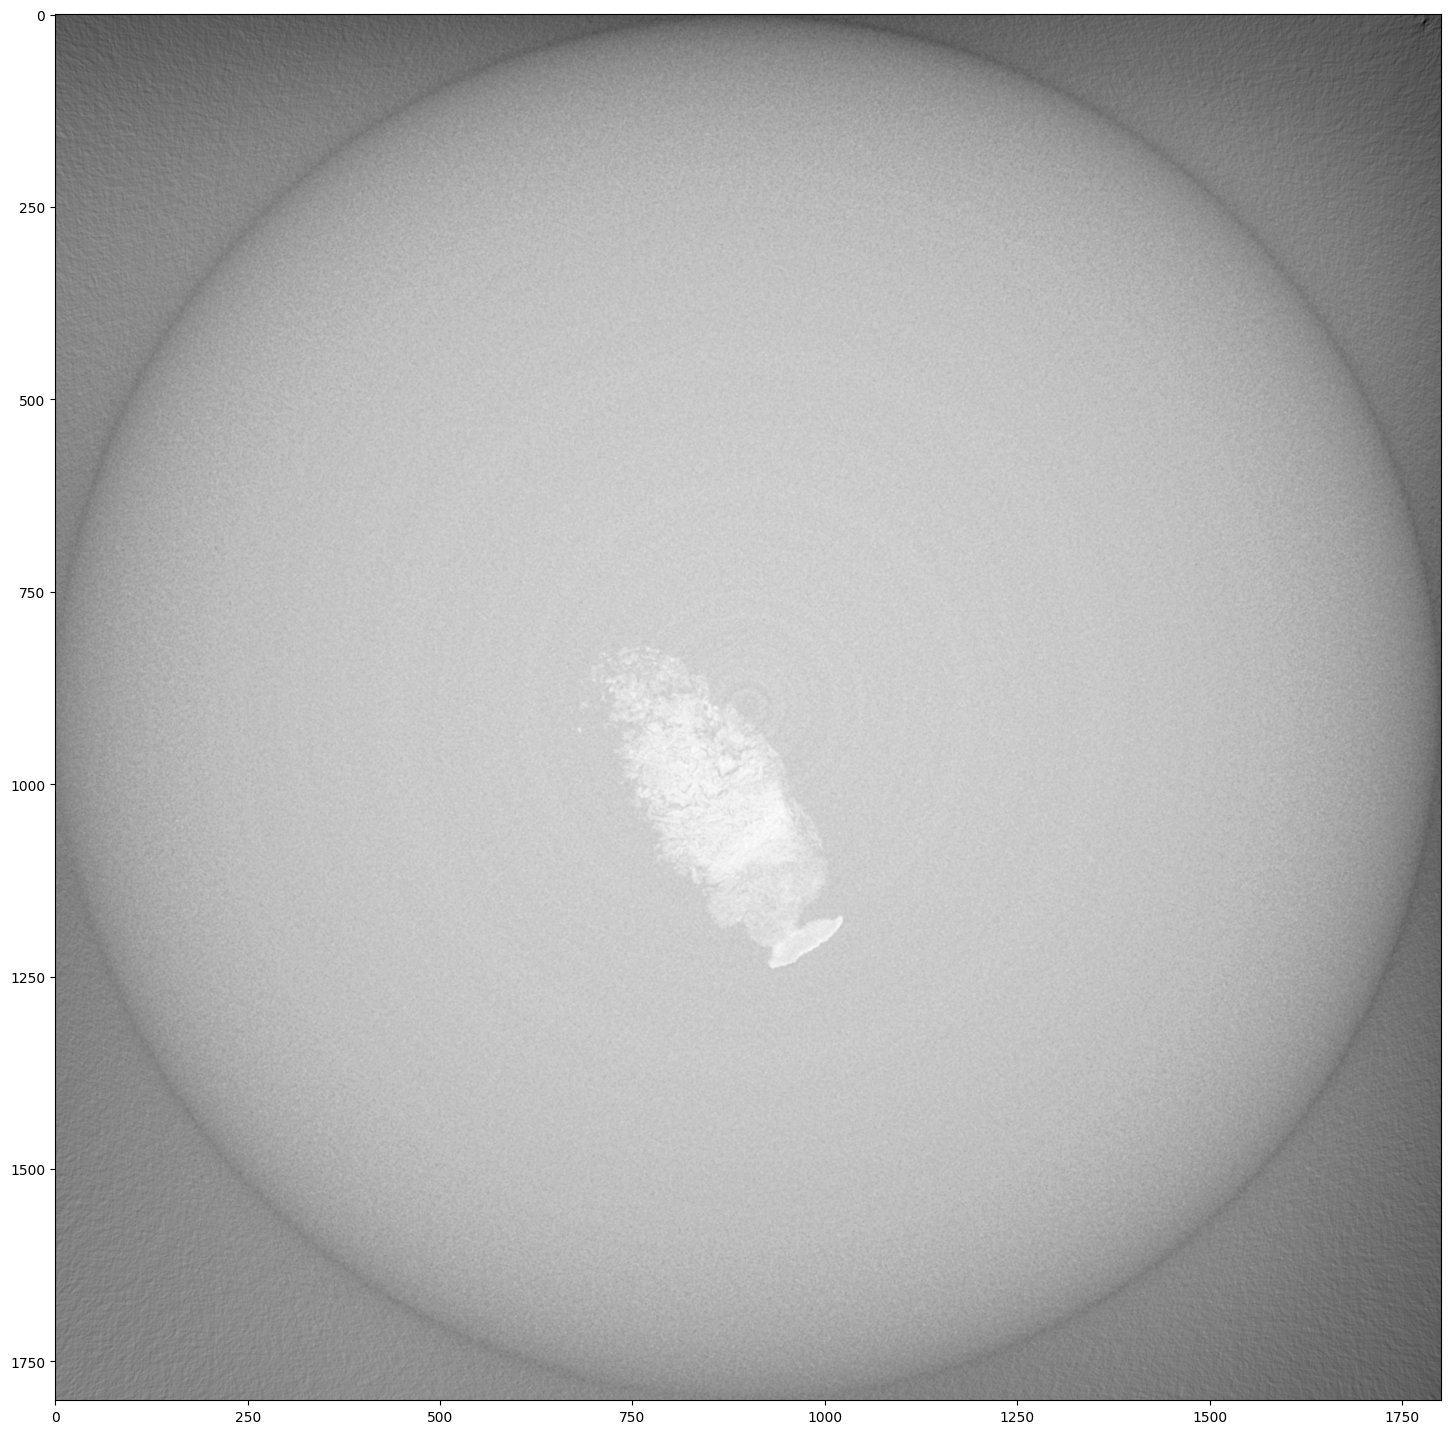

In [58]:
#plot image in maximum resolution
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

plt.figure(figsize=(18, 18))
plt.imshow(image, cmap=cm.Greys_r)


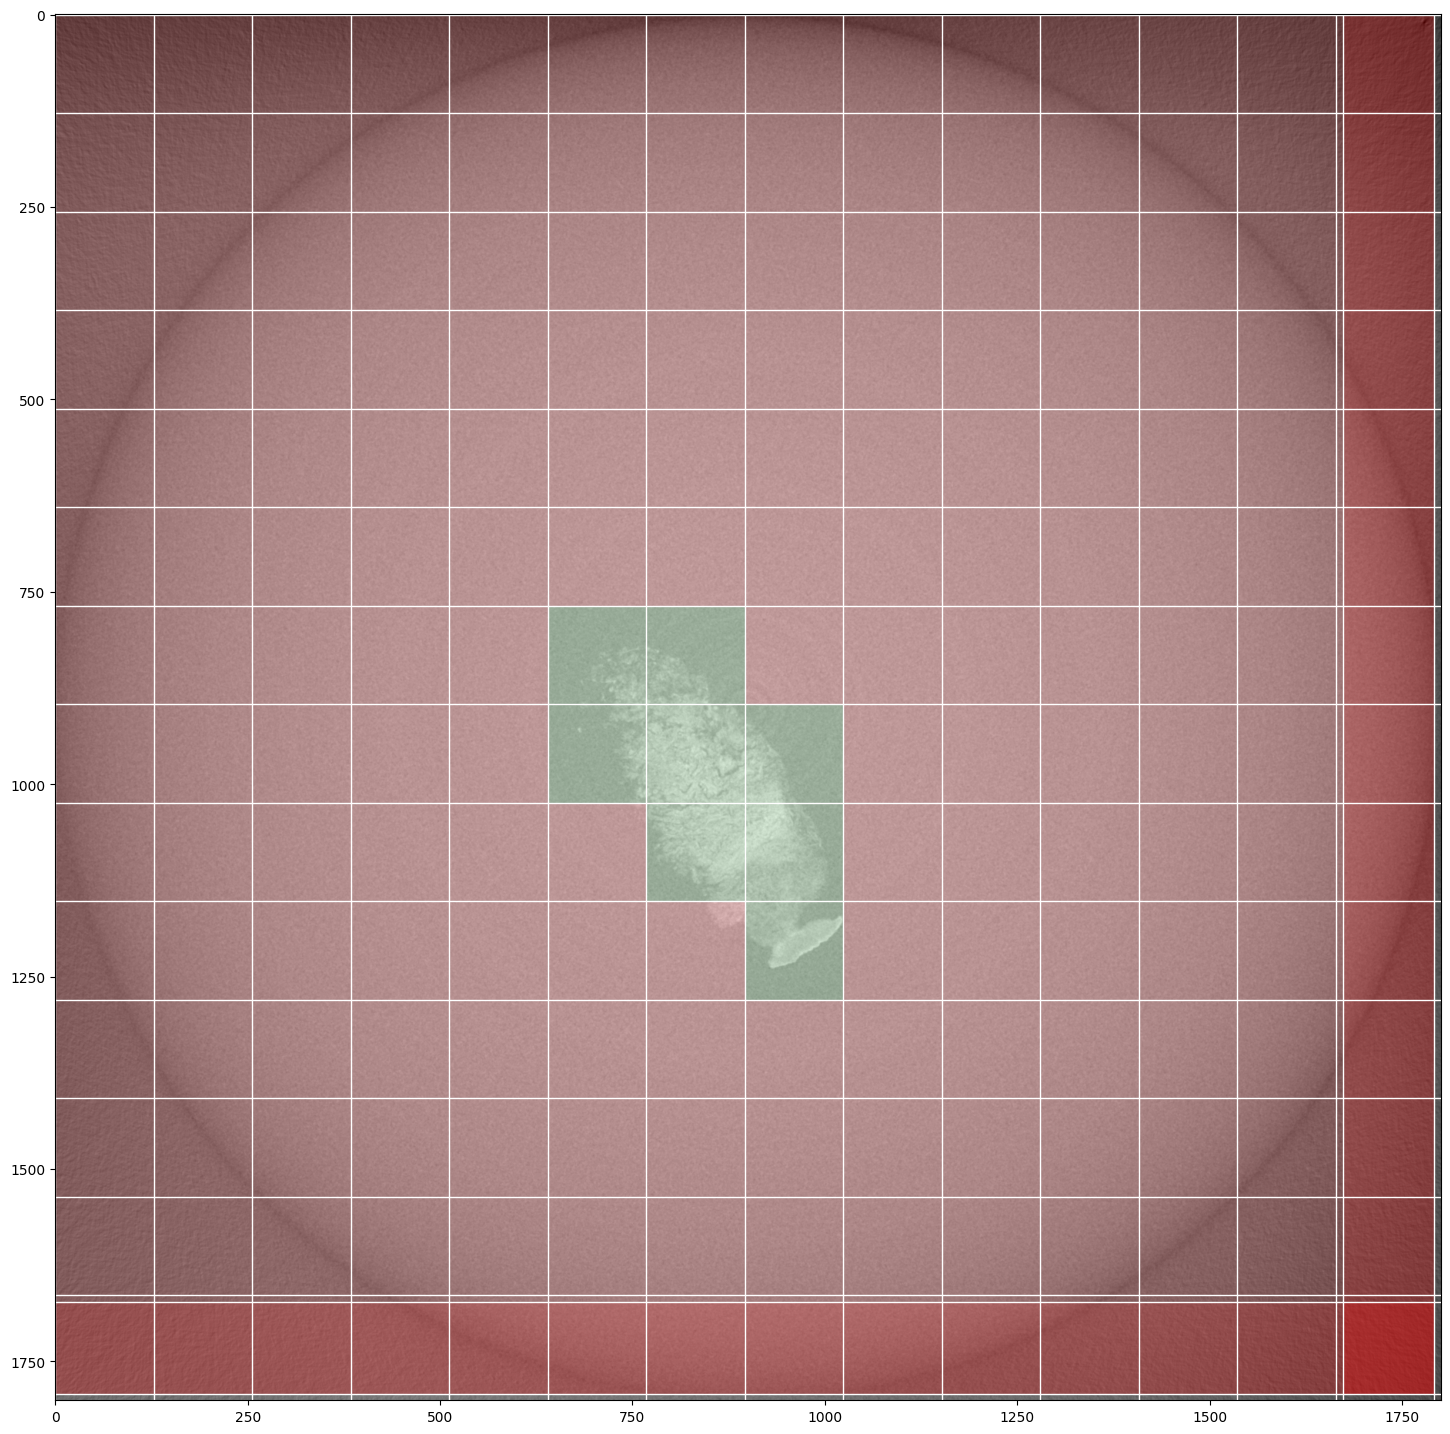

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# Suppose 'img' is your image as a 2D NumPy array (height x width).
# For this demo, let's make a random 613x410 image (neither dimension is a multiple of 128).
height, width = 1801,1801


fig, ax = plt.subplots()
ax.imshow(image, cmap='gray', origin='upper')

# Calculate the largest multiple of 128 that is <= each dimension
x_max = (width // 128) * 128
y_max = (height // 128) * 128

# Create the line positions from 0 up to and including x_max, stepping by 128
x_positions = np.arange(0, x_max+1, 128)
y_positions = np.arange(0, y_max+1, 128)

x_positions = np.append(x_positions, width - 128)
y_positions = np.append(y_positions, height - 128)

# Draw vertical lines
for x in x_positions:
    ax.axvline(x, color='white', linewidth=1)

# Draw horizontal lines
for y in y_positions:
    ax.axhline(y, color='white', linewidth=1)
green_cells = [(7, 5), (6, 6), (6, 5),(7,6),(7,7),(8,7),(9,7),(8,6)]
########################################################################

# Now add the patches. Loop over the row (j) and column (i) indices of cells.
for j in range(len(y_positions) - 1):        # row index
    for i in range(len(x_positions) - 1):    # column index

        # Coordinates and size of each patch
        x_start = x_positions[i]
        y_start = y_positions[j]
        cell_width = x_positions[i+1] - x_start
        cell_height = y_positions[j+1] - y_start

        # Decide the patch color based on whether (j, i) is in green_cells
        if (j, i) in green_cells:
            facecolor = 'green'
        else:
            facecolor = 'red'

        rect = patches.Rectangle(
            (x_start, y_start),
            cell_width,
            cell_height,
            edgecolor=None,
            linewidth=0,
            facecolor=facecolor,
            alpha=0.15
        )
        ax.add_patch(rect)
# Set the figure size to maximum resolution
fig.set_size_inches(18, 18)

# Display the plot
plt.show()


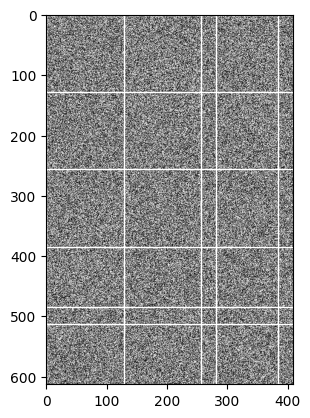

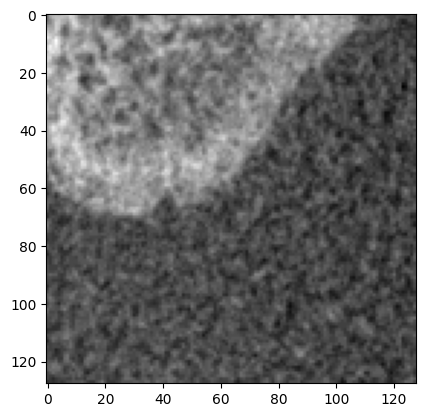

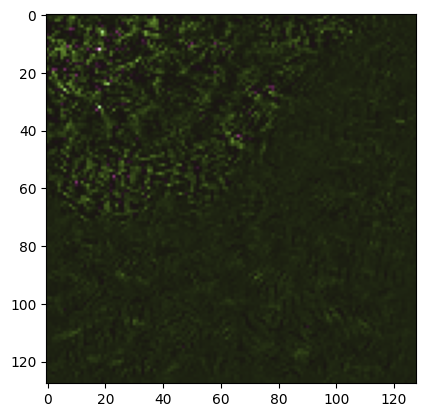

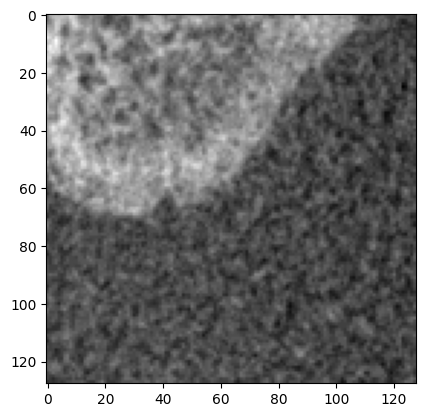

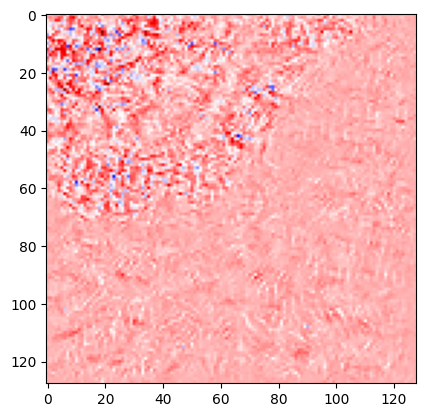

tensor(0.)
tensor(1.)


In [87]:
import matplotlib.pyplot as plt
plt.imshow(sample[0][1,:,:], cmap='gray',vmin=0, vmax=1)
plt.show()
plt.imshow(numpy_attributions[1,:,:], cmap='vanimo')#,vmin=24000, vmax=45000)
plt.show()
plt.imshow(sample[0][1,:,:], cmap='gray')#,vmin=24000, vmax=45000)
plt.show()
plt.imshow(numpy_attributions[1,:,:], cmap='seismic')#,vmin=24000, vmax=45000)
plt.show()

print(sample[0].min())
print(sample[0].max())

In [ ]:
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

In [ ]:
model = SwinUNETR.swin_unetr_base(input_size=(128,128,32))

In [ ]:
model.swinViT.layers4[0].downsample.reduction = nn.Linear(3072,3)
model.swinViT.layers4[0].downsample.norm= nn.Identity(3,3)

In [ ]:
print(model)

In [ ]:
model.eval()
random_tensor = torch.randn(1,1,128, 128, 32)
print(random_tensor.shape)

outout = model(random_tensor)

In [ ]:
print(outout.shape)
print(outout[0])
import torch.nn.functional as F
print(F.softmax(outout[0], dim=0))  

In [ ]:
model = models.video.r3d_18()

In [ ]:
model = models.video.swin3d_b(models.video.Swin3D_B_Weights.KINETICS400_V1)

In [ ]:
model.eval()

# Create a dummy input: (batch=1, channels=3, time=32, height=224, width=224)
dummy_input = torch.randn(1, 3, 1, 1)

# Run a forward pass to confirm it works
with torch.no_grad():
    output = model(dummy_input)

print("Output shape:", output.shape)

In [ ]:
m = nn.AdaptiveAvgPool2d((5, 7))
input = torch.randn(1, 64, 8, 9)
output = m(input)
print(output.shape)
# target output size of 7x7 (square)
m = nn.AdaptiveAvgPool2d(3)
input = torch.randn(1, 2, 2)
print(input)
output = m(input)
print(output.shape)
print(output)
# target output size of 10x7
m = nn.AdaptiveAvgPool2d((None, 7))
input = torch.randn(1, 64, 10, 9)
output = m(input)
print(output.shape)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from torchvision import transforms
from torchvision.models import video
from torch.utils.data import DataLoader
import sys
sys.path.append('/home/christoph/Dokumente/christoph-MA/MA-Repo')
import Aggregator_Module
import Dataloader_slice_parts_aggregator
from train import train_model
from eval import evaluate_model
from collections import OrderedDict

data_path = "/storage/Datensätze"

device = torch.device("cuda")

encoder = video.r3d_18(pretrained=True)

encoder.to(device)

num_ftrs = encoder.fc.out_features

dropout = 0

decoder_enc = nn.Sequential(
                            nn.Linear(num_ftrs, 128),
                            nn.GELU(),
                            nn.Dropout(dropout)
                            )

model = Aggregator_Module.AttnMeanPoolMIL(gated=True, dropout=dropout, out_dim=3,encoder=decoder_enc,encoder_dim=128)

model.start_attention(freeze_encoder=False)

batch_size = 8

epochs = 50

dataset = Dataloader_slice_parts_aggregator.VolumeToSlicepartsDataset(data_path, transform=None, test=True,encoder=encoder,augmentation="tripath")

train_set, val_set = torch.utils.data.random_split(dataset, [int(0.9 * len(dataset)), len(dataset) - int(0.9 * len(dataset))])

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)



In [ ]:
features,labels = dataset.__getitem__(0)
print(features.shape)
print(labels)

In [ ]:
import torch.nn.functional as F
model = model.to(device)


output = model(features.unsqueeze(0))
print((output))

In [ ]:
_, preds = torch.max(output, 1)

In [ ]:
preds.item()

In [ ]:
for patch in patches:
    print(patch.shape)

In [ ]:
import matplotlib.pyplot as plt
for patch in patches:
    plt.imshow(patch[:,:], cmap='gray')
    plt.show()

In [ ]:
tensor = torch.randn(10,3,128,128,32)

In [ ]:
input = torch.tensor1,tensor

In [ ]:
out =  aggregator_model(tensor)